In [3]:
# from importib import reload
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import sys
sys.path.append('..')

from scripts.data_utils.loaders import *
from scripts.data_utils.cleaning import *
from scripts.utils.visualizations import *

%autoreload 2

In [5]:
train_file = "../data/train.csv"
test_file = "../data/test.csv"
store_file = "../data/store.csv"

train, test, store = load_train_test_store(train_file, test_file, store_file)
train.shape, test.shape, store.shape

2025-01-03 14:31:33 - INFO - Loading data from file ...
2025-01-03 14:31:33 - INFO - Loading data from file ...
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\data_utils\loaders.py:23: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=sep)
2025-01-03 14:31:35 - INFO - Loaded data from ../data/train.csv, shape: (1017209, 9)
2025-01-03 14:31:35 - INFO - Loaded data from ../data/train.csv, shape: (1017209, 9)
2025-01-03 14:31:35 - INFO - Loading data from file ...
2025-01-03 14:31:35 - INFO - Loading data from file ...
2025-01-03 14:31:35 - INFO - Loaded data from ../data/test.csv, shape: (41088, 8)
2025-01-03 14:31:35 - INFO - Loaded data from ../data/test.csv, shape: (41088, 8)
2025-01-03 14:31:35 - INFO - Loading data from file ...
2025-01-03 14:31:35 - INFO - Loading data from file ...
2025-01-03 14:31:35 - INFO - Loaded data from ../data/store.csv, shape: (1115, 10)
2025-01-

((1017209, 9), (41088, 8), (1115, 10))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
# Handle missing values
missing_strategies = {
    "CompetitionDistance": "median",
    "StateHoliday": "None",
    "PromoInterval": "None"
}

train_cleaned = train.copy()
store_cleaned = store.copy()

store_cleaned = handle_missing_values(store_cleaned, missing_strategies)
store_cleaned

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\data_utils\cleaning.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
2025-01-03 14:31:37 - INFO - Filled missing values in CompetitionDistance with median.
2025-01-03 14:31:37 - INFO - Filled missing values in CompetitionDistance with median.
2025-01-03 14:31:37 - WARNING - Column StateHoliday not found in DataFrame.
2025-01-03 14:31:37 - WARNING - Column StateHoliday not found in DataFrame.
c:\Users\Darkl

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,None
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,None
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,None
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,None


In [12]:
# Detect and review outliers
outlier_columns = ["Sales", "Customers", "CompetitionDistance"]
outliers = detect_outliers(train_cleaned, outlier_columns)

for col, outlier_data in outliers.items():
    print(f"Outliers in {col}: {len(outlier_data)} rows")

2025-01-03 14:31:37 - INFO - Detected 26694 outliers in Sales.
2025-01-03 14:31:37 - INFO - Detected 26694 outliers in Sales.
2025-01-03 14:31:37 - INFO - Detected 38095 outliers in Customers.
2025-01-03 14:31:37 - INFO - Detected 38095 outliers in Customers.
2025-01-03 14:31:37 - WARNING - Column CompetitionDistance not found in DataFrame.
2025-01-03 14:31:37 - WARNING - Column CompetitionDistance not found in DataFrame.


Outliers in Sales: 26694 rows
Outliers in Customers: 38095 rows


In [13]:
# Sales outliers detected
len(outliers['Sales'])

26694

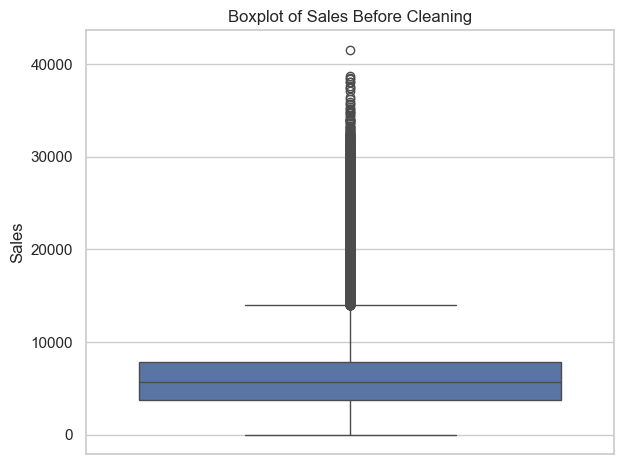

In [14]:
# Boxplot of Sales Before Cleaning
plot_box(data=train, column_name='Sales', title="Boxplot of Sales Before Cleaning")

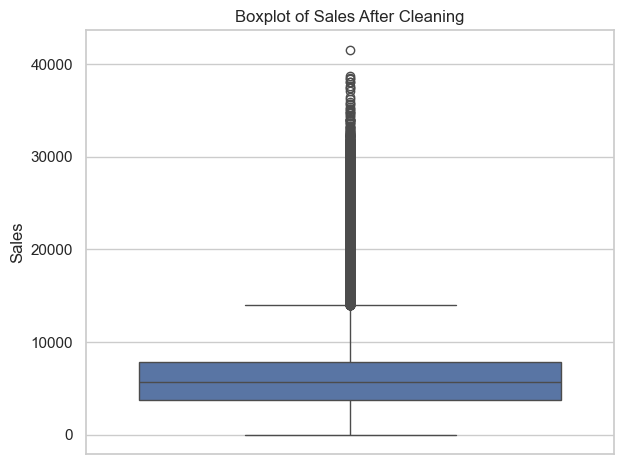

In [15]:
# Boxplot of Sales After Cleaning
plot_box(data=train_cleaned, column_name='Sales', title="Boxplot of Sales After Cleaning")


In [16]:
# Remove unnecessary columns
irrelevant_columns = ["Id"]
train_cleaned = remove_irrelevant_columns(train_cleaned, irrelevant_columns)
train.shape, train_cleaned.shape, store.shape, store_cleaned.shape

2025-01-03 14:31:44 - INFO - Dropped columns: ['Id']
2025-01-03 14:31:44 - INFO - Dropped columns: ['Id']


((1017209, 9), (1017209, 9), (1115, 10), (1115, 10))

In [17]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [18]:
store_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


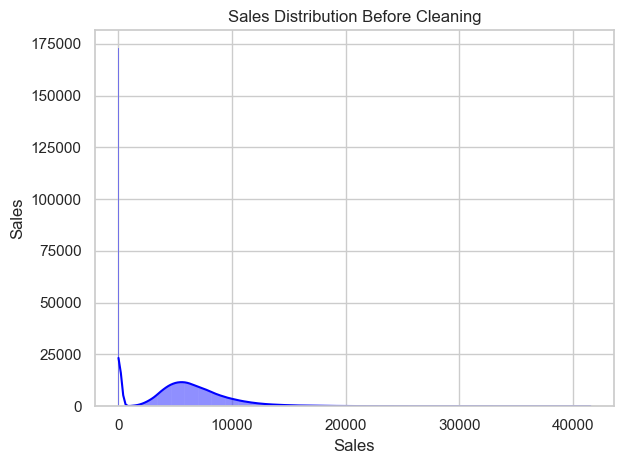

In [19]:
plot_hist(data=train, column_name='Sales', title='Sales Distribution Before Cleaning')

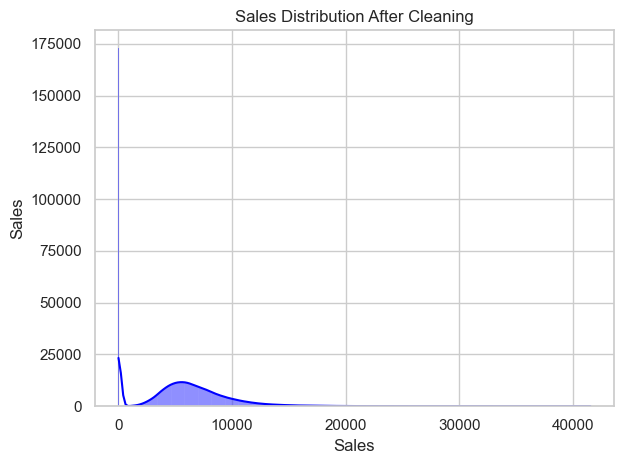

In [20]:
plot_hist(data=train_cleaned, column_name='Sales', title='Sales Distribution After Cleaning')

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[column], label="Train", shade=True, color="blue")
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[column], label="Test", shade=True, color="red")


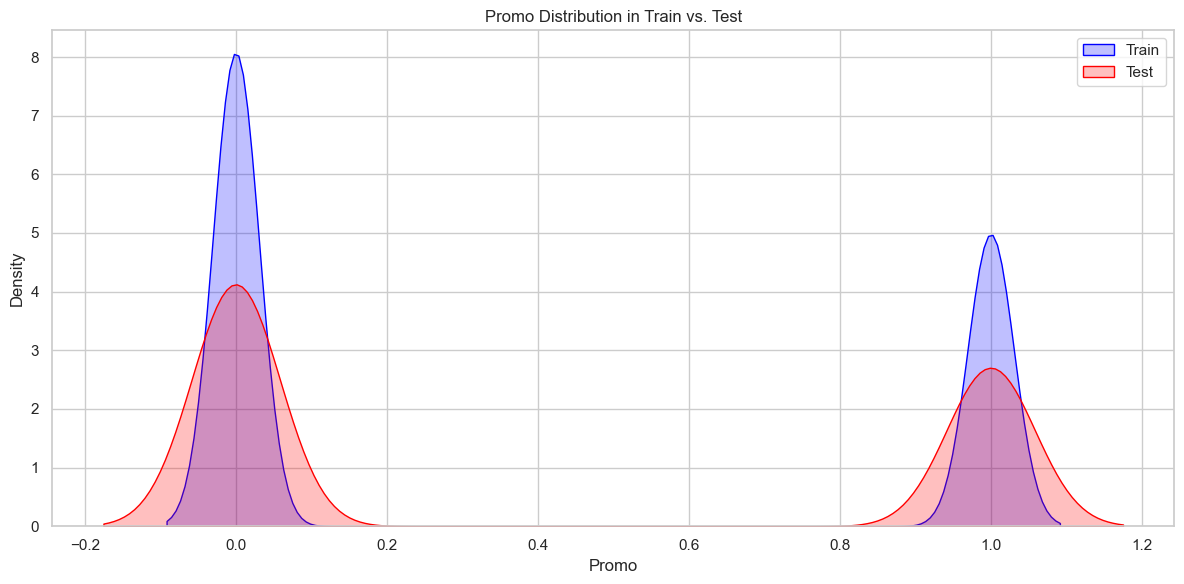

In [21]:
# Visualizing Promo distribution comparison
compare_numerical_distributions(train, test, "Promo", "Promo Distribution in Train vs. Test")

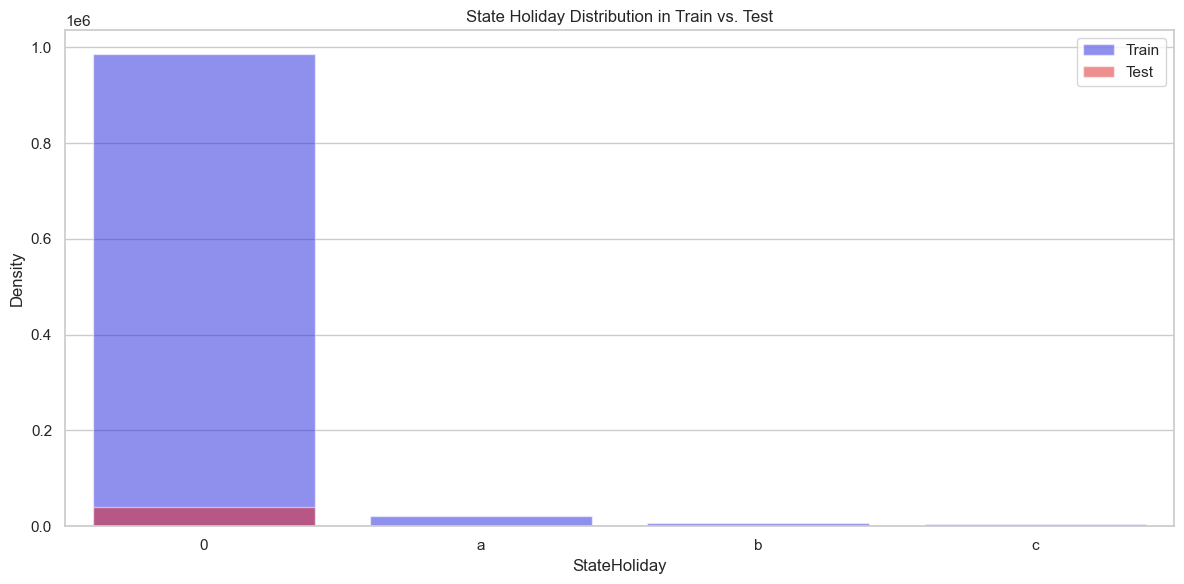

In [22]:
# Comparing State Holidays
compare_categoical_distributions(train, test, "StateHoliday", "State Holiday Distribution in Train vs. Test")

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[column], label="Train", shade=True, color="blue")
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[column], label="Test", shade=True, color="red")


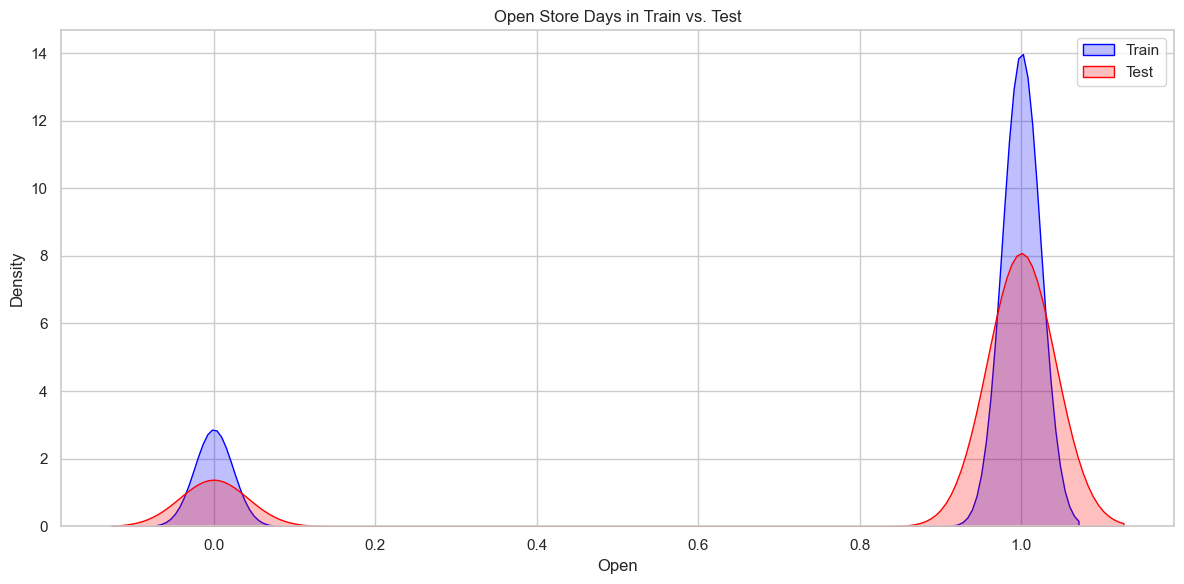

In [23]:
# Visualizing Open store days comparison
compare_numerical_distributions(train, test, "Open", "Open Store Days in Train vs. Test")

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[column], label="Train", shade=True, color="blue")
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[column], label="Test", shade=True, color="red")


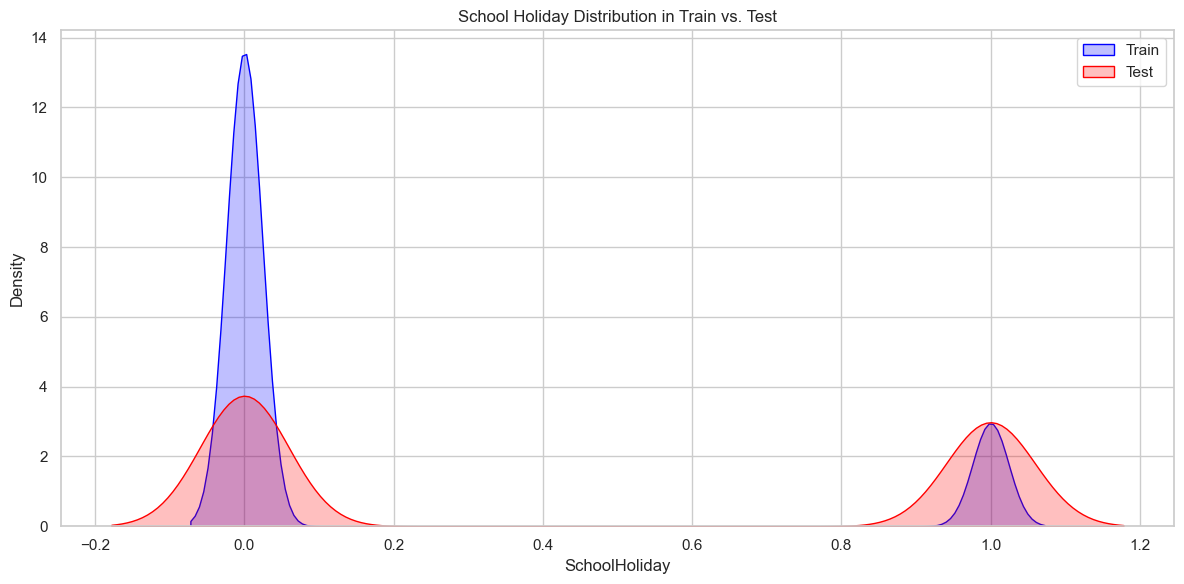

In [24]:
# Comparing School Holidays
compare_numerical_distributions(train, test, "SchoolHoliday", "School Holiday Distribution in Train vs. Test")

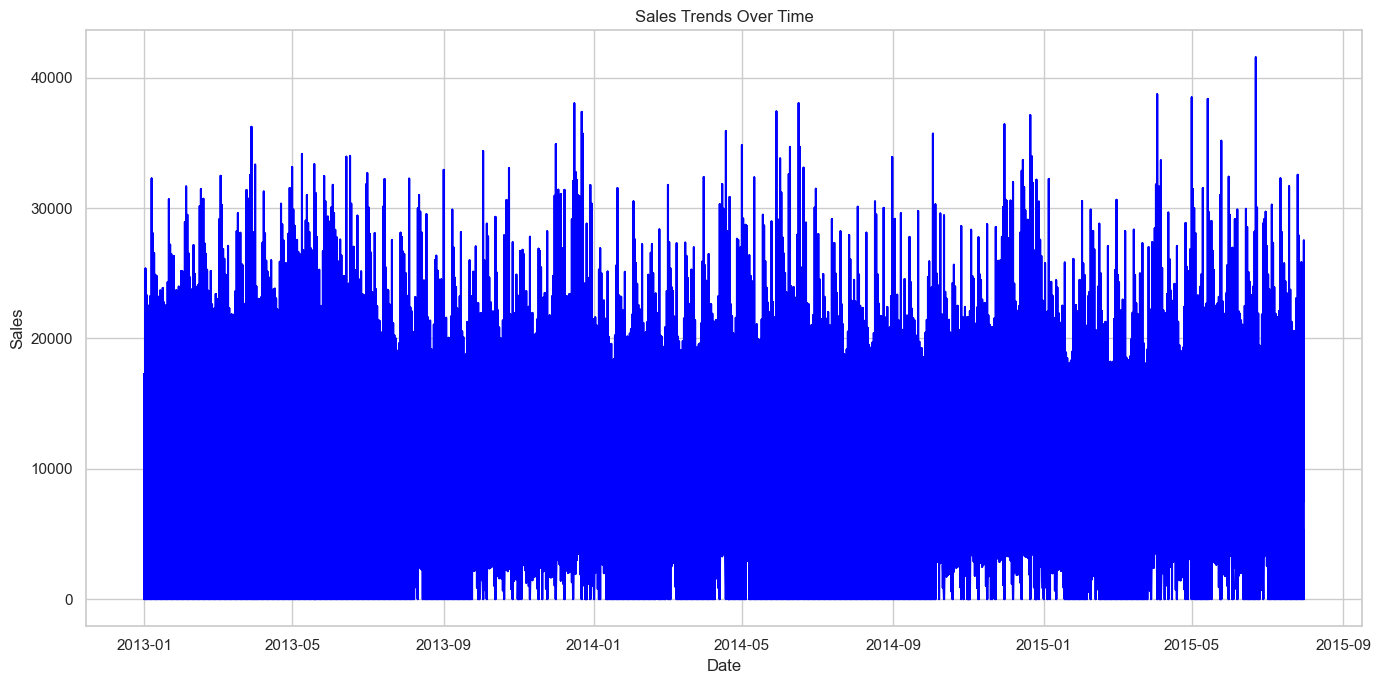

In [25]:
sales_trends(train, "Sales")

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="StoreType", y=sales_column, data=merged, palette="Set2")


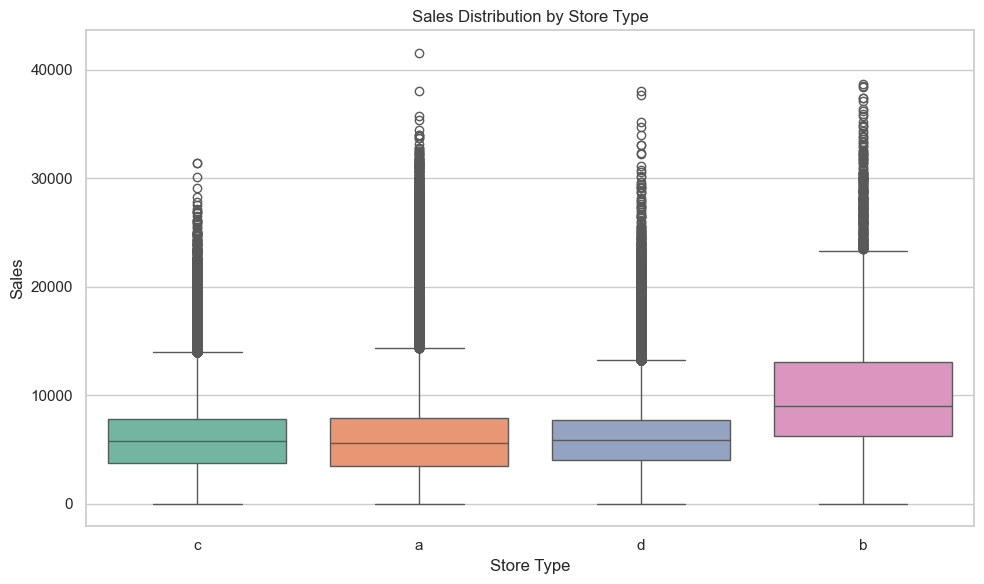

In [26]:
sales_by_store_type(train, store, "Sales")

In [27]:
# Correlation Analysis
exclude_columns = ['Weekday', 'Month', 'Date', 'StateHoliday']
plot_correlation_matrix(train.drop(columns=exclude_columns))

KeyError: "['Weekday', 'Month'] not found in axis"

In [ ]:
# Correlation Heatmap for continuous variables
# columns = ["Sales", "Customers", "Promo", "CompetitionDistance"]
columns = ["Sales", "Customers", "CompetitionDistance"]
analyze_correlation(train.merge(store, on="Store"), columns, "Correlation Heatmap of Sales and Related Variables")

In [ ]:
sales_during_holidays(train, "Promo", "Sales")

In [ ]:
sales_during_holidays(train, "SchoolHoliday", "Sales")

In [ ]:
# Assortment Analysis
sales_during_holidays(train.merge(store, on="Store"), "Assortment", "Sales")

In [ ]:
# Plotting Sales vs Customers
plot_sales_vs_customers(train)

In [ ]:
# Cumulative Sales
plot_cumulative_sales(train)

In [ ]:
# Rolling Statistics
plot_rolling_statistics(train.set_index('Date'), 'Sales', 'Rolling Statistics of Sales', 'Date', 'Sales')

In [ ]:
plot_rolling_statistics_2(train.set_index('Date'), 'Sales', 'Rolling Statistics of Sales', 'Date', 'Sales')

In [ ]:
# Seasonal Decomposition
seasonal_decomposition(train.set_index('Date'), 'Sales', freq=12)

In [ ]:
# Weekly Sales Plot
plot_sales(train.set_index('Date'), 'Sales', freq='W')

In [ ]:
# Sales Heatmap
plot_sales_heatmap(train)

In [ ]:
# Weekday Sales Distribution
plot_weekday_sales(train)

In [ ]:
# Promotion Effect
plot_promotion_effect(train)

In [ ]:
# Holiday Effect
plot_holiday_effect(train)

In [36]:
# ACF and PACF
# plot_ACF_PACF(train.set_index('Date'), 'Sales')